---
layout: post
title: "Visualizing distributions"
comments: true
modified:
categories: blog
excerpt: 'Common visualization examples for distributions'
tags: [data, distribution, visualization, seaborn]
image:
  feature:
date: 2017-01-14T15:39:55-04:00
modified: 2017-01-14T14:19:19-04:00
---

###### Sections:

* [1. Histogram](#Histograms-:)
* [2. Scatter plot](#Scatter-Plot-:)
* [3. Density plot](#Density-Plot-:)
* [4. Boxplot](#Boxplot-:)
* [5. Violin-plot](#Violin-Plot-:)
* [6. Heatmap](#Heatmap-:)
* [7. Rugs](#Rugs-:)

In [3]:
%pylab inline

import pandas as pd
import seaborn as sns
import sqlite3

Populating the interactive namespace from numpy and matplotlib


##### Read data

In [4]:
db_path = './data/world-development-indicators/database.sqlite'

conn = sqlite3.connect(db_path)
db = conn.cursor()
db.execute("SELECT name FROM sqlite_master WHERE type='table';")
print(db.fetchall())

[('Country',), ('CountryNotes',), ('Series',), ('Indicators',), ('SeriesNotes',), ('Footnotes',)]


##### Countries

In [5]:
data_countries = pd.read_sql_query('select * from Country',conn)

##### Series

In [6]:
data_series = pd.read_sql_query('select * from Series',conn)

##### Indicators

In [7]:
data_indicators = pd.read_sql_query('select * from Indicators',conn)

# Histograms :

##### Plot data

In [6]:
selected_indicators = ['Life expectancy at birth, female (years)',
                       'Life expectancy at birth, male (years)',
                       'Life expectancy at birth, total (years)']
countries = data_countries.CountryCode[data_countries.Region!=''].unique()
condition = data_indicators.IndicatorName.isin(selected_indicators)

data_plot = data_indicators.loc[condition,:]
condition = data_plot.CountryCode.isin(countries)
data_plot = data_plot.loc[condition,:]
data_plot.sort_values(['CountryName','IndicatorName','Year'], inplace=True)

data_plot = data_plot.groupby(['CountryName','IndicatorName'], as_index=False).last()
data_plot[['feature','type']] = data_plot['IndicatorName'].str.split(', ',expand=True)
data_plot.reset_index(inplace=True, drop=True)

##### Plot

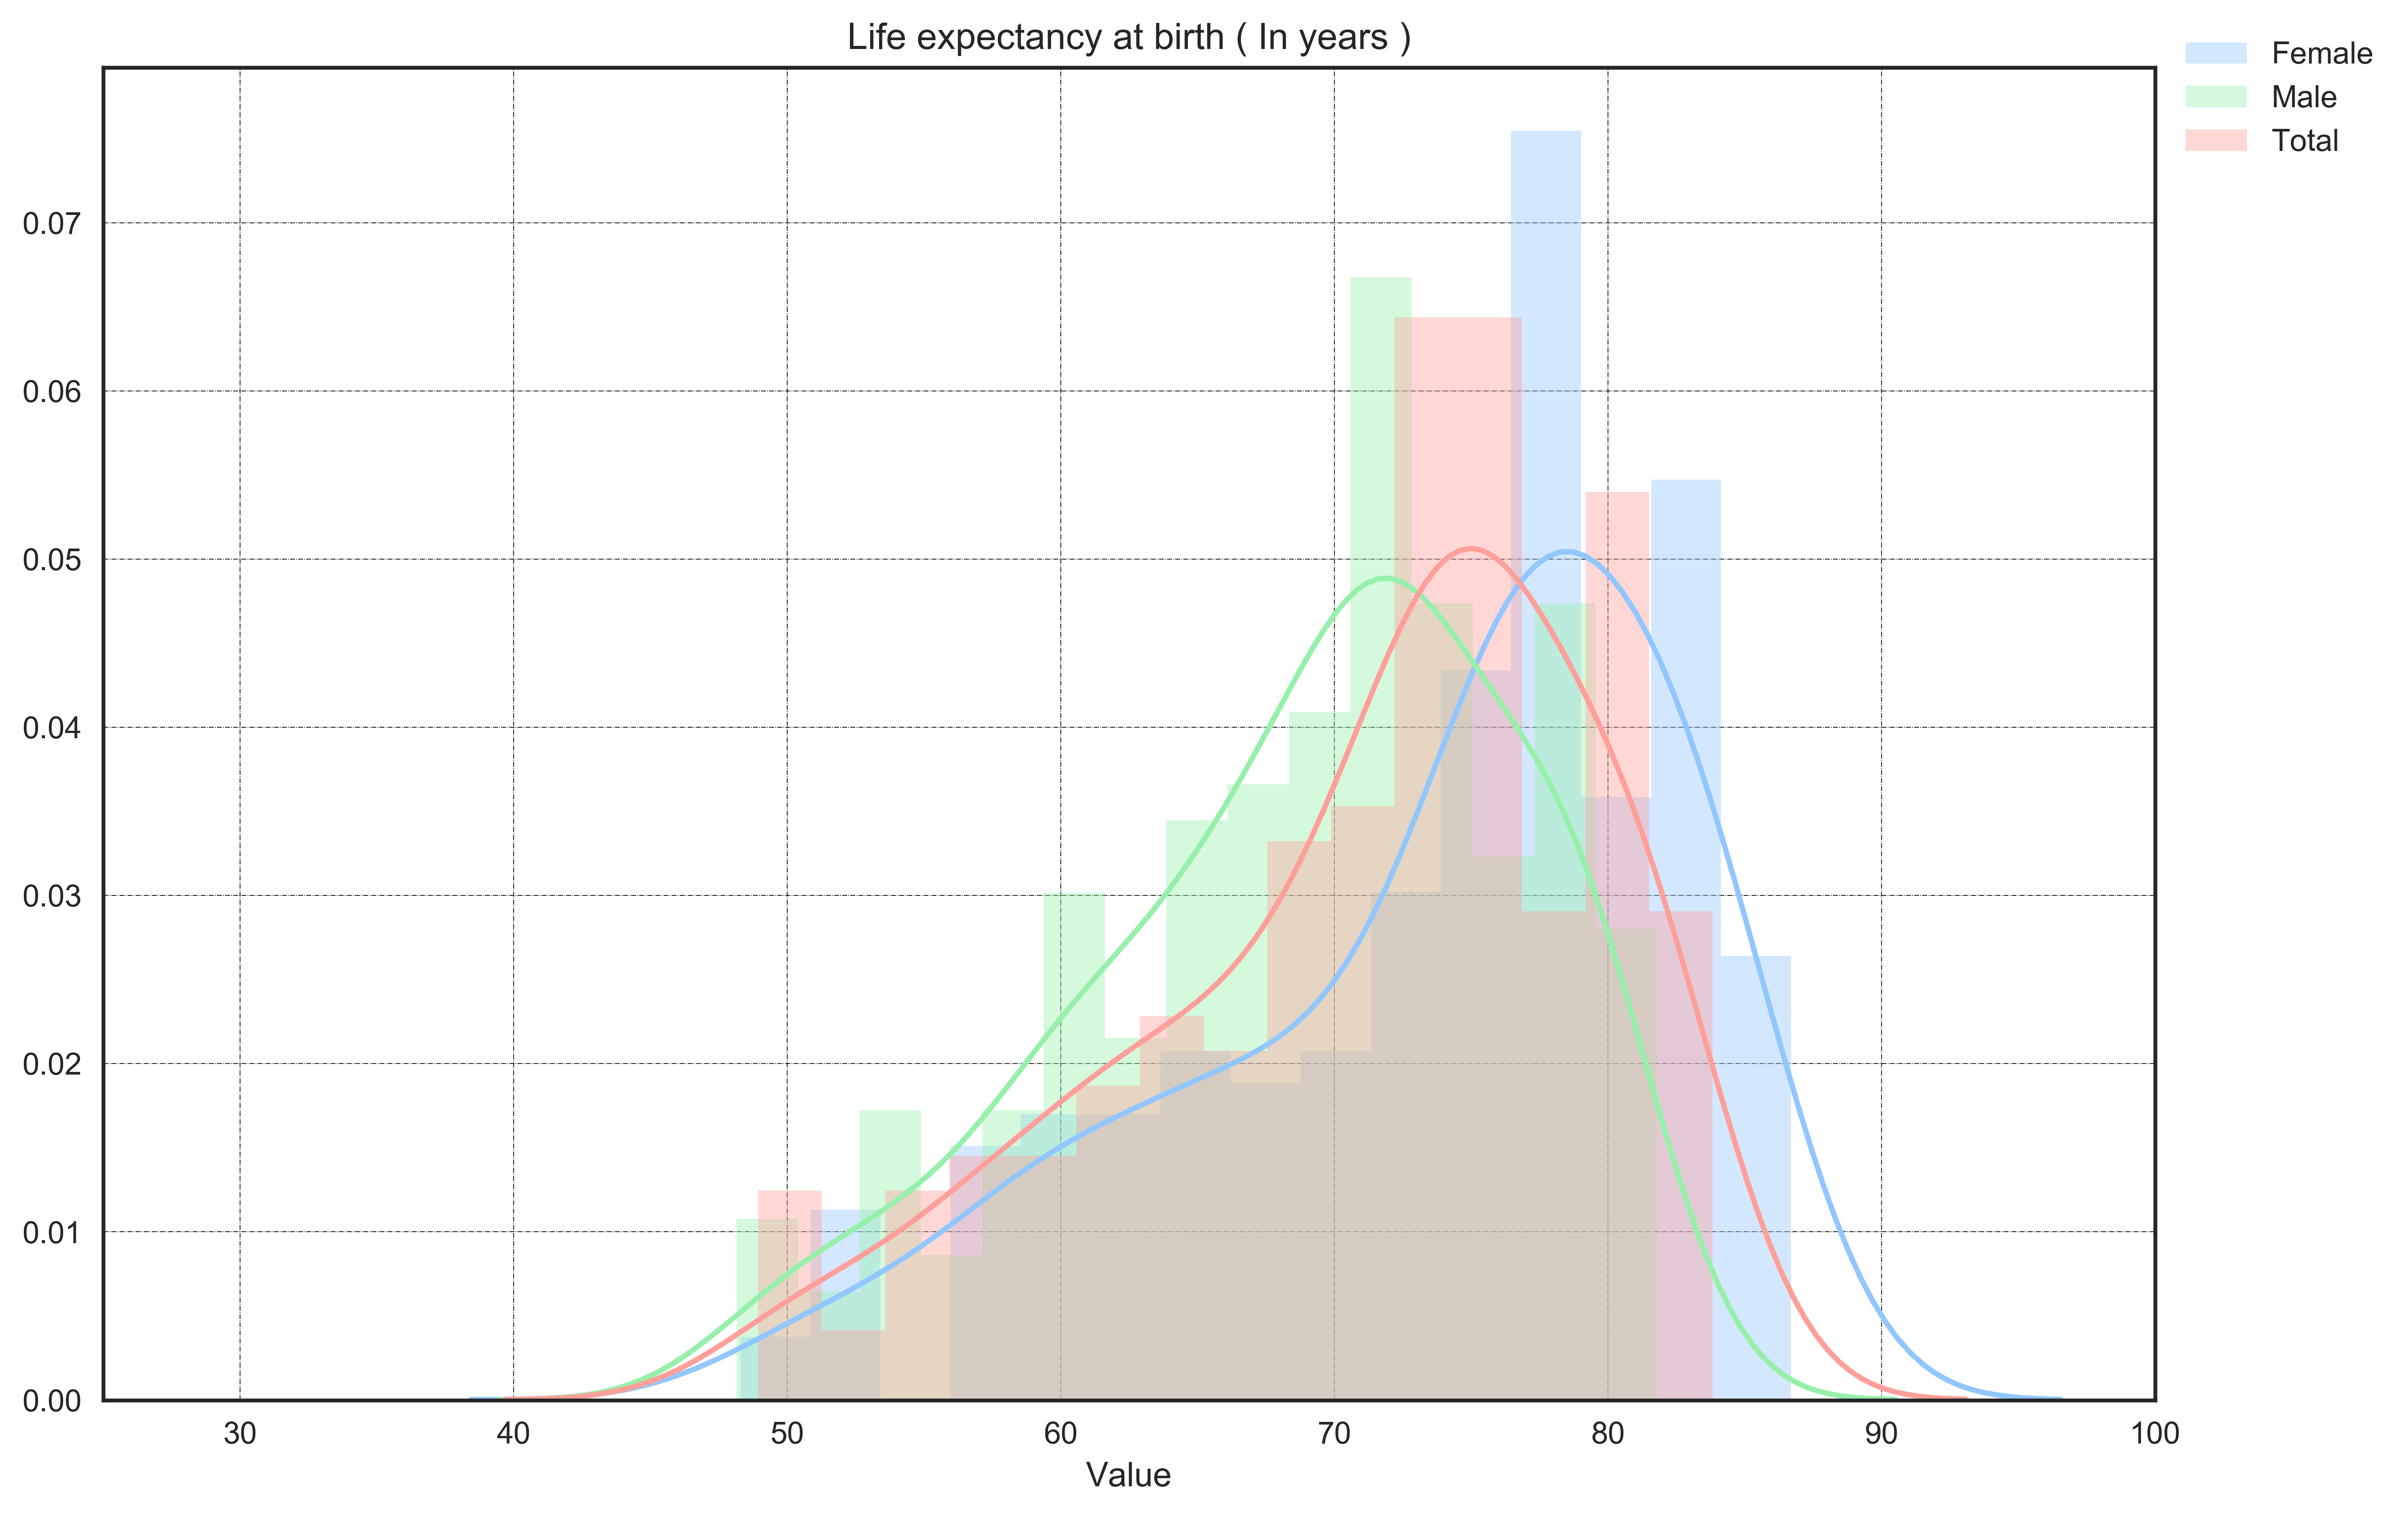

In [7]:
nbins = 15
sns.set(style="white", 
        palette="pastel", 
        color_codes=True, 
        rc={'figure.figsize':(12,8),
            'figure.dpi':500})

sns.distplot(data_plot.Value[data_plot.type=='female (years)'], bins=nbins)
sns.distplot(data_plot.Value[data_plot.type=='male (years)'], bins=nbins)
sns.distplot(data_plot.Value[data_plot.type=='total (years)'], bins=nbins)
plt.legend(['Female', 'Male', 'Total'], bbox_to_anchor=(1.12,1.04))
plt.xlim((25,100))
plt.grid(color='black',linestyle='-.',linewidth=0.25)
plt.title('Life expectancy at birth ( In years )')
plt.savefig('./plots/01.histogram.png', 
            dpi=250, bbox_inches='tight');

# Scatter Plot :

##### Plot data

In [8]:
selected_indicators = ['Unemployment, female (% of female labor force)',
                       'Unemployment, male (% of male labor force)']

countries = data_countries.CountryCode[data_countries.Region!=''].unique()
condition = data_indicators.IndicatorName.isin(selected_indicators)

data_plot = data_indicators.loc[condition,:]
condition = data_plot.CountryCode.isin(countries)
data_plot = data_plot.loc[condition,:]
data_plot.sort_values(['CountryName','IndicatorName','Year'], inplace=True)

data_plot = data_plot.groupby(['CountryName','IndicatorName'], as_index=False).last()
data_plot[['feature','type']] = data_plot['IndicatorName'].str.split(', ',expand=True)
data_plot.reset_index(inplace=True, drop=True)
data_plot['type'] = data_plot.type.str.replace(' \(% of male labor force\)','')
data_plot['type'] = data_plot.type.str.replace(' \(% of female labor force\)','')
data_plot = data_plot.pivot_table(values='Value',index='CountryName',columns='type')

##### Plot

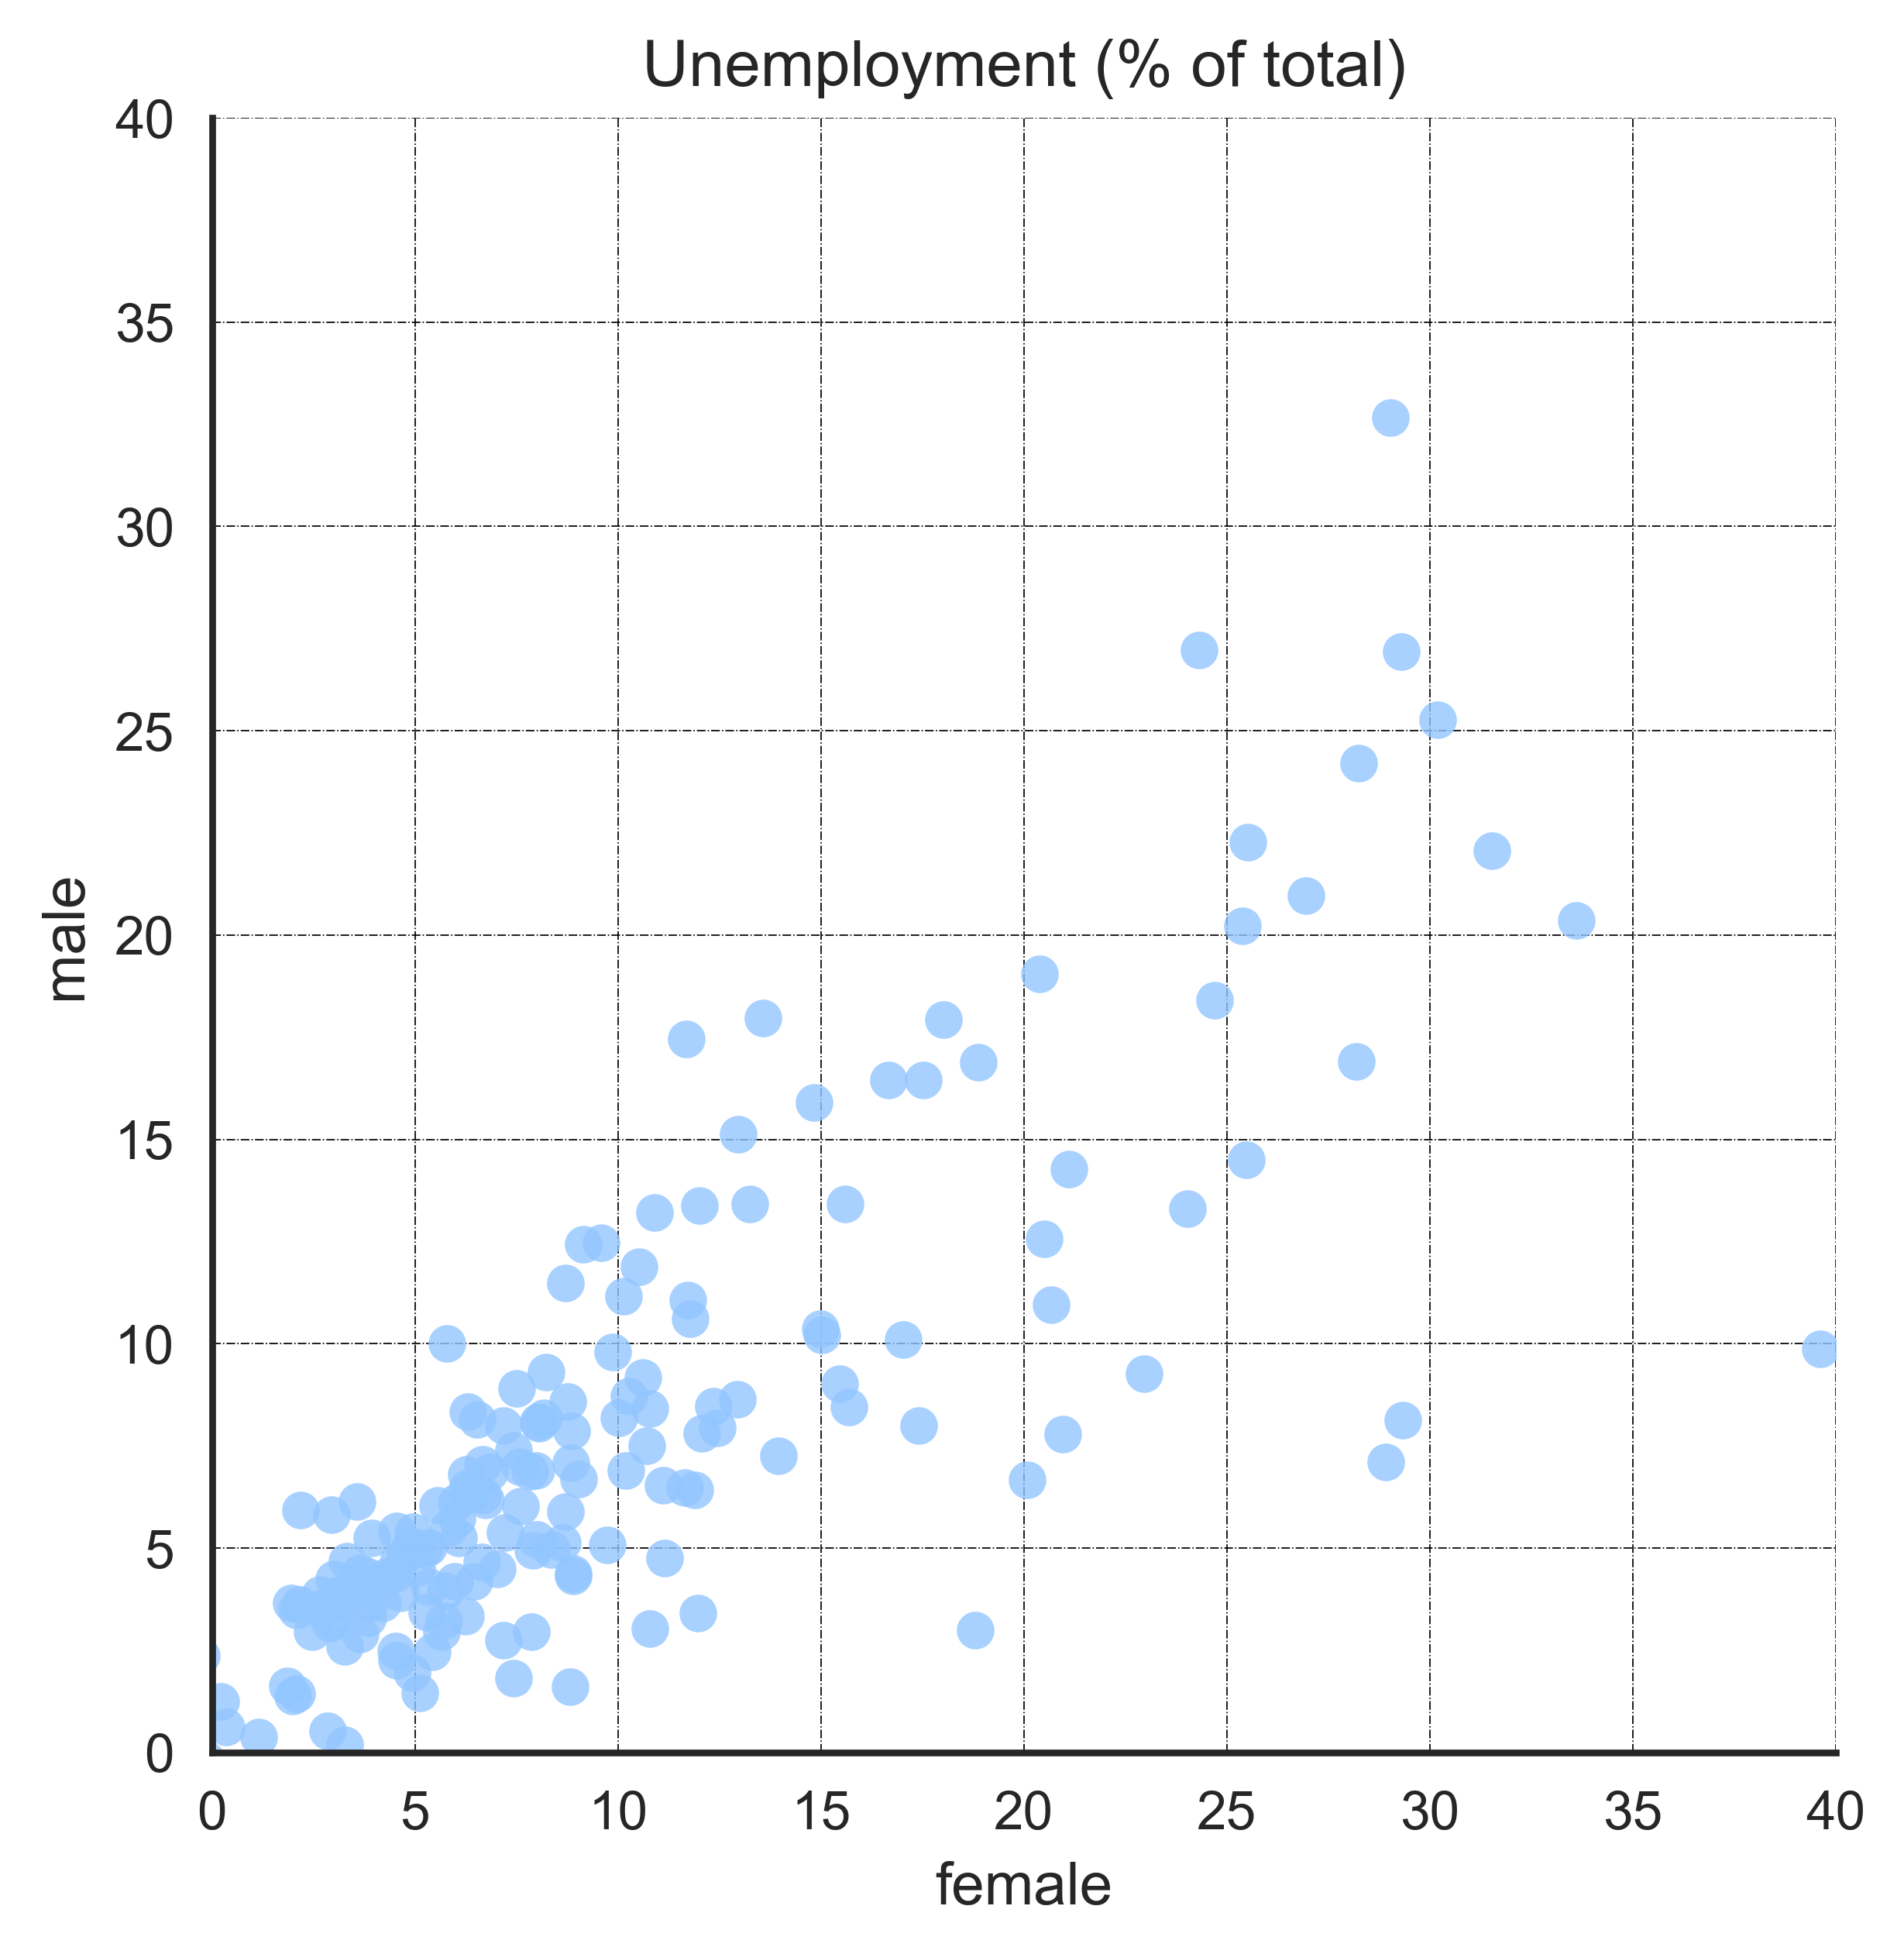

In [9]:
sns.set(style="white",
        palette="pastel",
        rc={'figure.figsize':(7,5),
            'figure.dpi':500})

sns.lmplot(x = 'female', y = 'male', data = data_plot, fit_reg=False, x_jitter=1.5, y_jitter=1.5)
plt.xlim((0,40))
plt.ylim((0,40))
plt.grid(color='black', linestyle='-.', linewidth=0.25)
plt.title('Unemployment (% of total)',)
plt.savefig('./plots/02.scatter.png', 
            dpi=250, bbox_inches='tight');

# Density Plot :

##### Plot data

In [10]:
selected_indicators = ['Mortality rate, adult, female (per 1,000 female adults)',
                       'Mortality rate, adult, male (per 1,000 male adults)']

countries = data_countries.CountryCode[data_countries.Region!=''].unique()
condition = data_indicators.IndicatorName.isin(selected_indicators)

data_plot = data_indicators.loc[condition,:]
condition = data_plot.CountryCode.isin(countries)
data_plot = data_plot.loc[condition,:]
data_plot.sort_values(['CountryName','IndicatorName','Year'], inplace=True)

data_plot = data_plot.groupby(['CountryName','IndicatorName'], as_index=False).last()
data_plot[['feature','type']] = data_plot['IndicatorName'].str.split(', adult, ',expand=True)
data_plot.reset_index(inplace=True, drop=True)
data_plot['type'] = data_plot.type.str.replace(' \(per 1,000 female adults\)','')
data_plot['type'] = data_plot.type.str.replace(' \(per 1,000 male adults\)','')
data_plot = data_plot.pivot_table(values='Value',index='CountryName',columns='type')

##### Plot

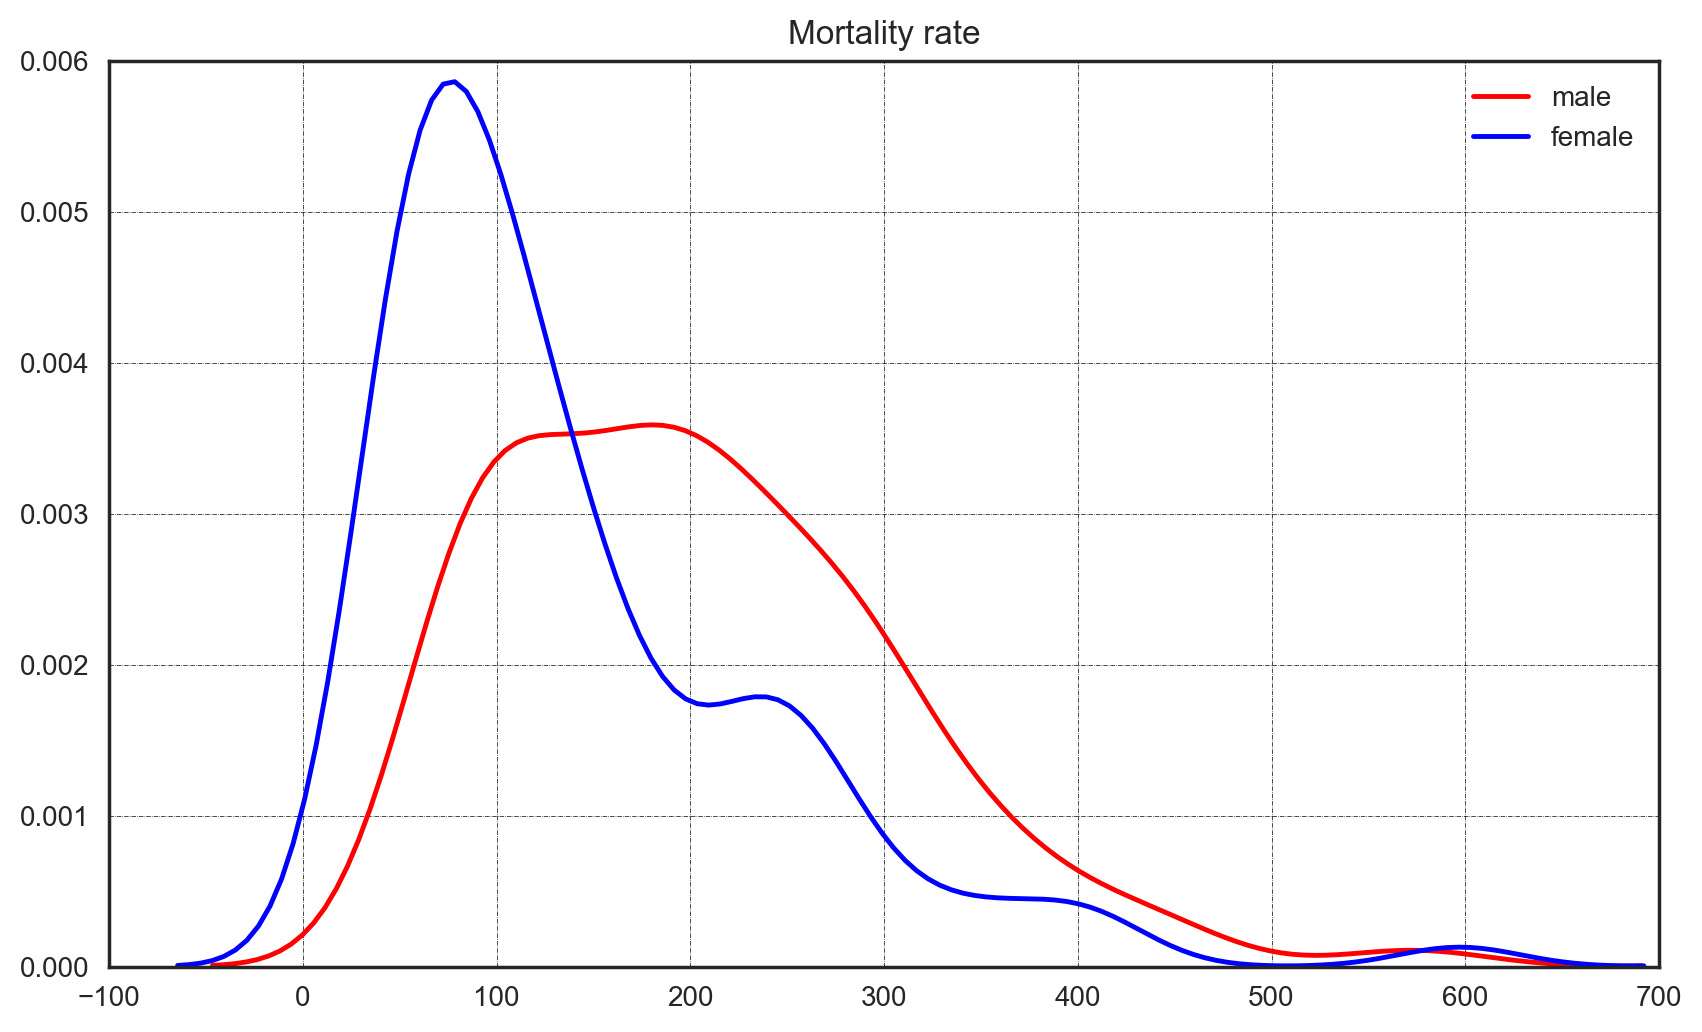

In [11]:
sns.set(style="white", 
        palette="pastel", 
        color_codes=True, 
        rc={
            'figure.figsize':(10,6),
            'figure.dpi':200
           })

sns.kdeplot(data_plot.male, color='red')
sns.kdeplot(data_plot.female, color='blue')
plt.grid(color='black',linestyle='-.', linewidth=0.25)
plt.title('Mortality rate')
plt.ylim((0,0.006))
plt.xlim((-100,700))
plt.savefig('./plots/03.density.png', 
            dpi=250, bbox_inches='tight');

# Box Plot :

##### Plot data

In [12]:
selected_indicators = ['Merchandise trade (% of GDP)']

countries = data_countries.CountryCode[data_countries.Region!=''].unique()
condition = data_indicators.IndicatorName.isin(selected_indicators)

data_plot = data_indicators.loc[condition,:]
condition = data_plot.CountryCode.isin(countries)
data_plot = data_plot.loc[condition,:]
data_plot.sort_values(['CountryName','IndicatorName','Year'], inplace=True)

data_plot = data_plot.groupby(['CountryName','IndicatorName'], as_index=False).last()
data_plot.reset_index(inplace=True, drop=True)
data_plot['Region'] = data_plot.merge(right=data_countries,on='CountryCode',how='left')['Region']

##### Plot

/Users/NPatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


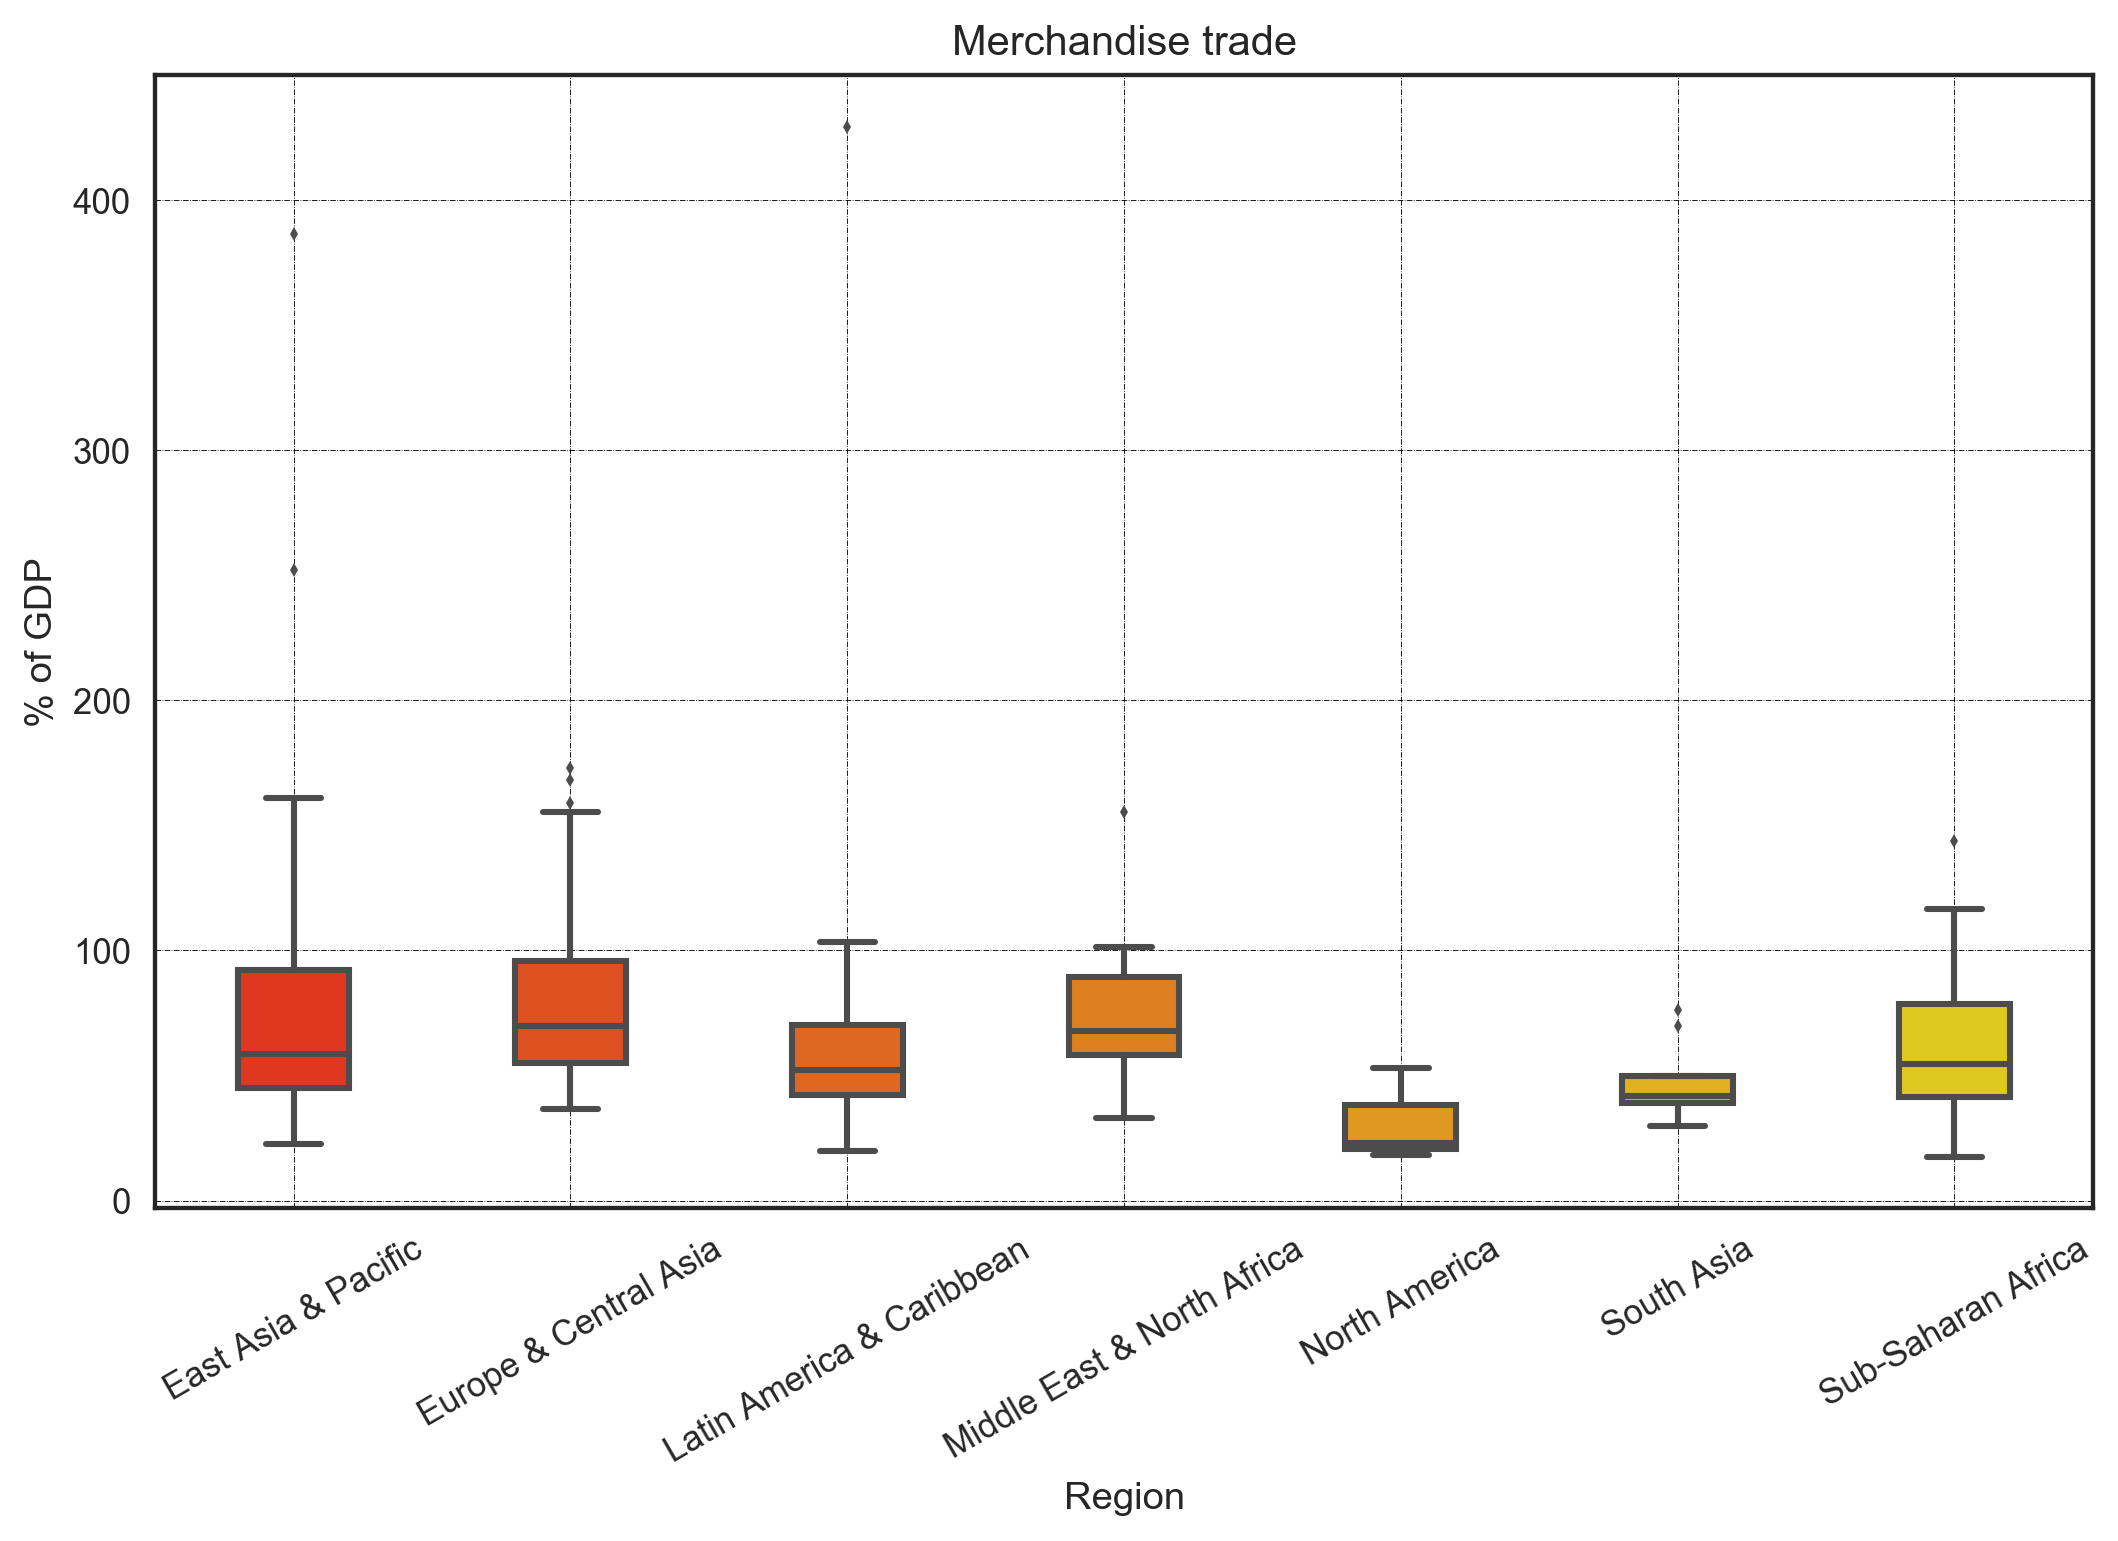

In [13]:
columns_order = sort(data_plot.Region.unique())

sns.set(style="white", 
        palette="pastel", 
        color_codes=True, 
        rc={
            'figure.figsize':(10,6),'figure.dpi':250
           })

sns.boxplot(x='Region',
            y='Value',
            palette='autumn',
            order=columns_order,
            width=0.4,
            fliersize=3,
            data=data_plot);
plt.grid(color='black',linestyle='-.', linewidth=0.25)
plt.xticks(rotation=30)
plt.title('Merchandise trade')
plt.ylabel('% of GDP');
plt.savefig('./plots/04.boxplot.png', 
            dpi=250, bbox_inches='tight');

# Violin Plot :

##### Plot data

In [27]:
selected_indicators = [ 'CO2 emissions from gaseous fuel consumption (% of total)', 
                        'CO2 emissions from liquid fuel consumption (% of total)']

countries = data_countries.CountryCode[data_countries.Region!=''].unique()
condition = data_indicators.IndicatorName.isin(selected_indicators)

data_plot = data_indicators.loc[condition,:]
condition = data_plot.CountryCode.isin(countries)
data_plot = data_plot.loc[condition,:]
data_plot.sort_values(['CountryName','IndicatorName','Year'], inplace=True)

data_plot = data_plot.groupby(['CountryName','IndicatorName'], as_index=False).last()
data_plot.reset_index(inplace=True, drop=True)
data_plot['Region'] = data_plot.merge(right=data_countries,on='CountryCode',how='left')['Region']

##### Plot

/Users/NPatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:647: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data[hue_mask])
/Users/NPatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:895: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data[hue_mask])
/Users/NPatil/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:915: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


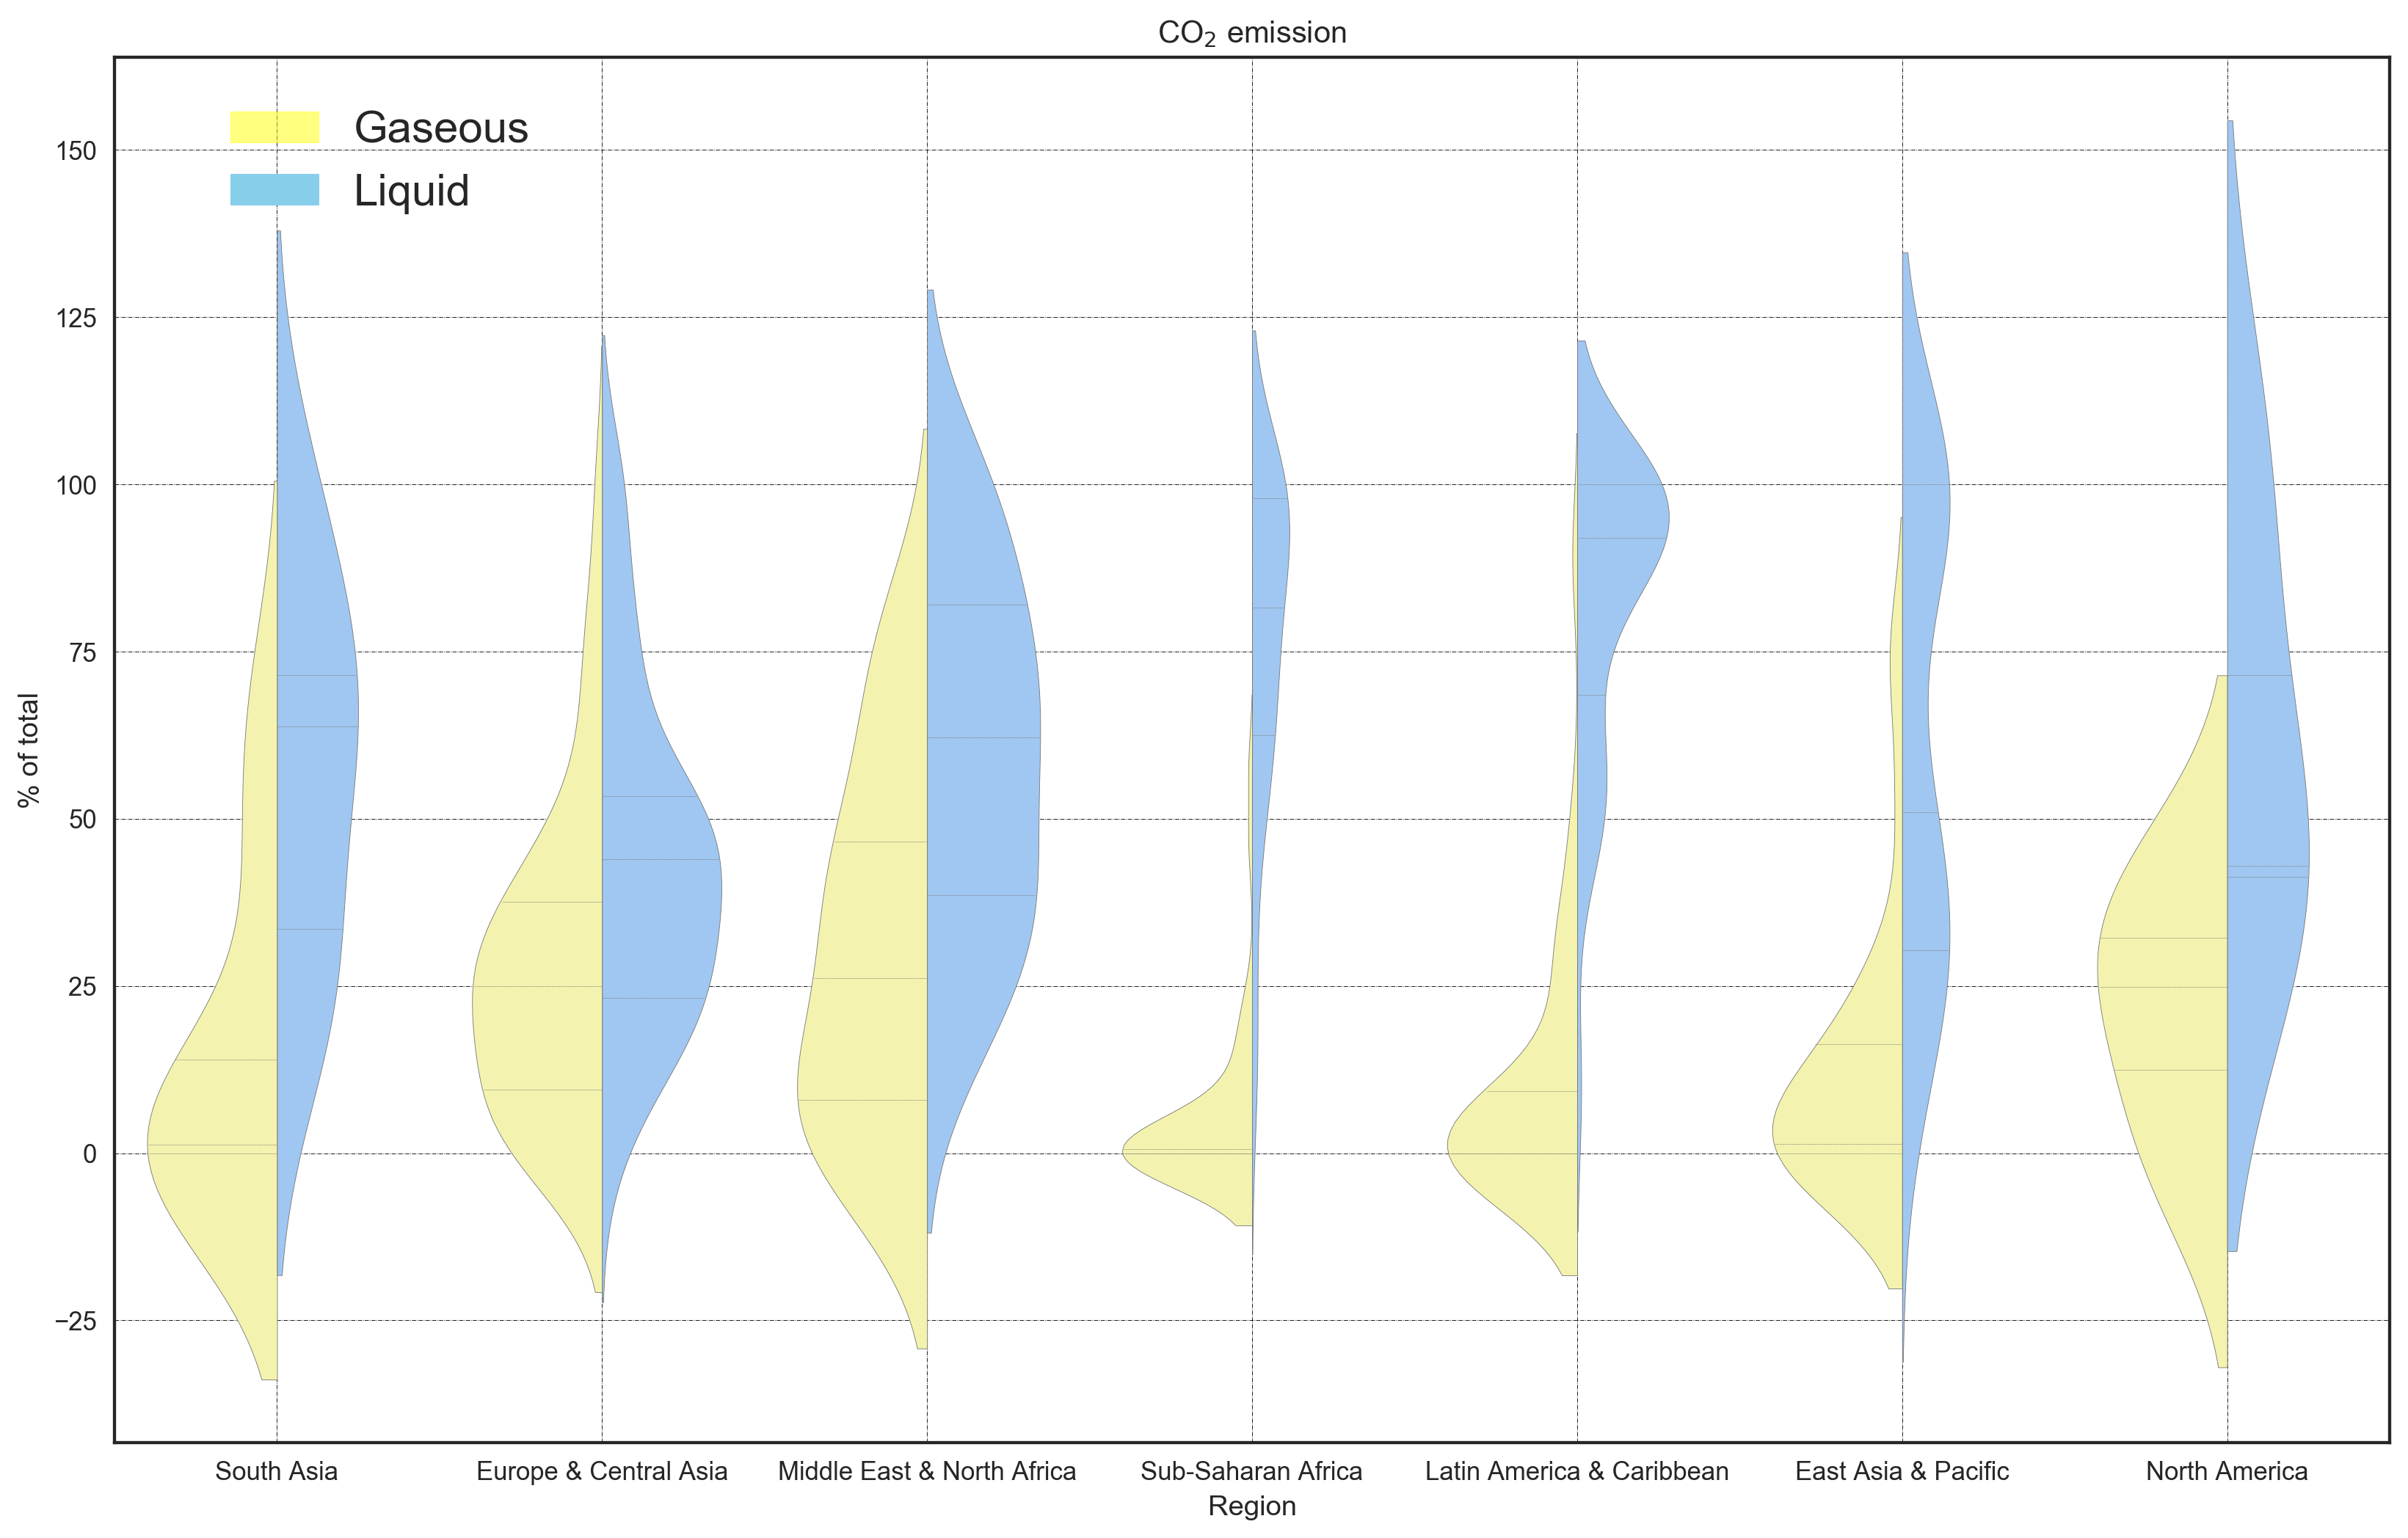

In [64]:
import matplotlib.patches as mpatches

columns_order = sort(data_plot.Region.unique())

sns.set(style="white", 
        palette="pastel", 
        color_codes=True, 
        rc={
            'figure.figsize':(16,10),'figure.dpi':250
           })
sns.violinplot(x ='Region', 
               y='Value', 
               hue='IndicatorName',
               linewidth=0.25,
               inner="quart",
               palette={"CO2 emissions from gaseous fuel consumption (% of total)": "y", 
                        "CO2 emissions from liquid fuel consumption (% of total)": "b"},
               data=data_plot, 
               split=True)
plt.grid(color='black',linestyle='-.', linewidth=0.25)
plt.title('CO$_2$ emission')
plt.ylabel('% of total')

gas_patch = mpatches.Patch(color='yellow', label='Gaseous',alpha=0.5)
liquid_patch = mpatches.Patch(color='skyblue', label='Liquid')
plt.legend(handles=[gas_patch, liquid_patch], bbox_to_anchor=(0.2, 0.99), fontsize='x-large')
plt.savefig('./plots/05.violinplot.png', dpi=250, bbox_inches='tight');

# Heatmap :

##### Plot data

In [38]:
selected_indicators_export = [ 
    'Merchandise exports to developing economies in East Asia & Pacific (% of total merchandise exports)',
    'Merchandise exports to developing economies in Latin America & the Caribbean (% of total merchandise exports)',
    'Merchandise exports to developing economies in Middle East & North Africa (% of total merchandise exports)',
    'Merchandise exports to developing economies in South Asia (% of total merchandise exports)',
    'Merchandise exports to developing economies in Sub-Saharan Africa (% of total merchandise exports)',
    'Merchandise exports to developing economies outside region (% of total merchandise exports)',
    'Merchandise exports to developing economies within region (% of total merchandise exports)',
    'Merchandise exports to economies in the Arab World (% of total merchandise exports)',
    'Merchandise exports to high-income economies (% of total merchandise exports)'
]

selected_indicators_imports = [
    'Merchandise imports from developing economies in East Asia & Pacific (% of total merchandise imports)',
    'Merchandise imports from developing economies in Latin America & the Caribbean (% of total merchandise imports)',
    'Merchandise imports from developing economies in Middle East & North Africa (% of total merchandise imports)',
    'Merchandise imports from developing economies in South Asia (% of total merchandise imports)',
    'Merchandise imports from developing economies in Sub-Saharan Africa (% of total merchandise imports)',
    'Merchandise imports from developing economies outside region (% of total merchandise imports)',
    'Merchandise imports from developing economies within region (% of total merchandise imports)',
    'Merchandise imports from economies in the Arab World (% of total merchandise imports)',
    'Merchandise imports from high-income economies (% of total merchandise imports)'
]

countries = data_countries.CountryCode[data_countries.Region!=''].unique()
condition = data_indicators.IndicatorName.isin(selected_indicators_export)
data_plot = data_indicators.loc[condition,:]
condition = data_plot.CountryCode.isin(countries)
data_plot = data_plot.loc[condition,:]
data_plot.sort_values(['CountryName','IndicatorName','Year'], inplace=True)
data_plot = data_plot.groupby(['CountryName','IndicatorName'], as_index=False).last()
data_plot.reset_index(inplace=True, drop=True)
data_plot['Region'] = data_plot.merge(right=data_countries,on='CountryCode',how='left')['Region']
data_export = data_plot.pivot_table(values='Value',columns='Region',index='IndicatorName')


countries = data_countries.CountryCode[data_countries.Region!=''].unique()
condition = data_indicators.IndicatorName.isin(selected_indicators_imports)
data_plot = data_indicators.loc[condition,:]
condition = data_plot.CountryCode.isin(countries)
data_plot = data_plot.loc[condition,:]
data_plot.sort_values(['CountryName','IndicatorName','Year'], inplace=True)
data_plot = data_plot.groupby(['CountryName','IndicatorName'], as_index=False).last()
data_plot.reset_index(inplace=True, drop=True)
data_plot['Region'] = data_plot.merge(right=data_countries,on='CountryCode',how='left')['Region']
data_import = data_plot.pivot_table(values='Value',columns='Region',index='IndicatorName')

##### Plot

In [50]:
ylabels = [ 
    'East Asia & Pacific',
    'Latin America & the Caribbean',
    'Middle East & North Africa',
    'South Asia',
    'Sub-Saharan Africa',
    'Developing economies outside region',
    'Developing economies within region',
    'Economies in the Arab World',
    'High-income economies'
]

xlabels = [
    'East Asia & Pacific',
    'Latin America & Caribbean',
    'Middle East & North Africa',
    'South Asia',
    'Sub-Saharan Africa',
    'Europe & Central Asia',
    'North America'
]

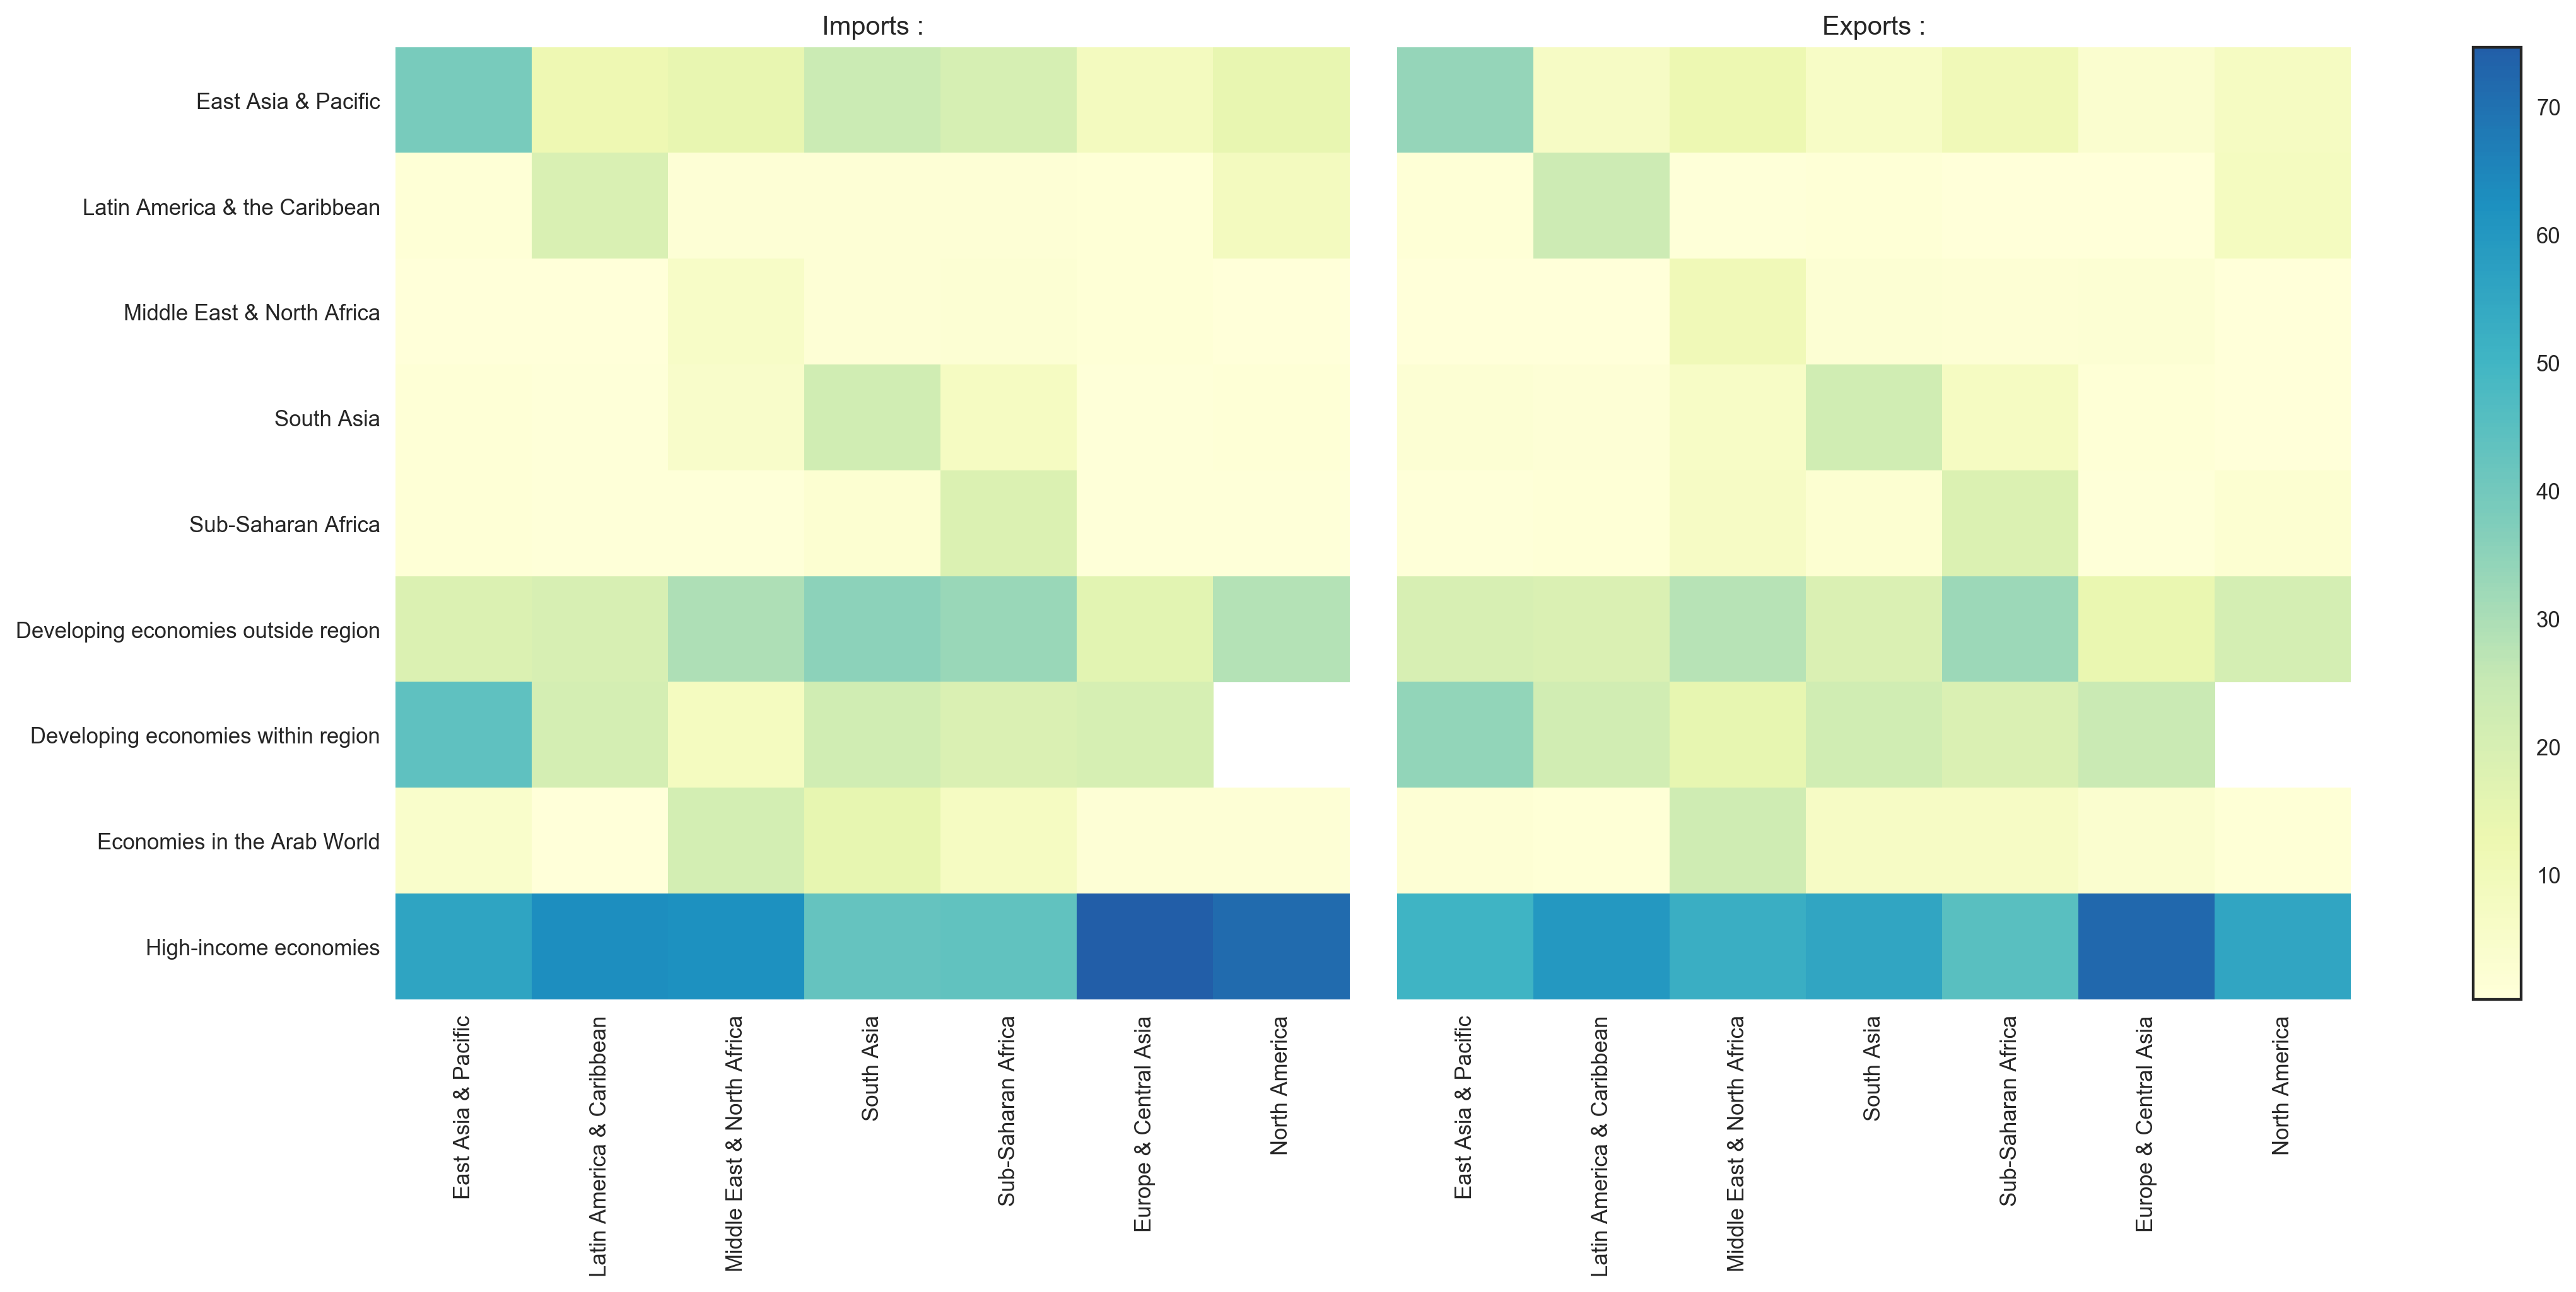

In [93]:
sns.set(style="white",
        color_codes=True, 
        rc={
            'figure.figsize':(20,8),
            'figure.dpi':250
           })
fig, (imports, exports) = plt.subplots(1, 2, sharex=True)

im1 = sns.heatmap(data_import.loc[:,xlabels], 
                  ax=imports,
                  center=50,
                  cbar=False, 
                  cmap="YlGnBu")
imports.set_yticklabels(ylabels)
imports.set_ylabel('')
imports.set_xlabel('')
imports.set_title('Imports :');

im2 = sns.heatmap(data_export.loc[:,xlabels], 
                  ax=exports, 
                  center=50,
                  yticklabels=False, 
                  cbar=False, 
                  cmap="YlGnBu")
exports.set_ylabel('')
exports.set_xlabel('')
exports.set_title('Exports :');
fig.subplots_adjust(wspace=0.05, hspace=0)

mappable = im1.get_children()[0]
fig.colorbar(mappable, ax = [imports,exports],orientation = 'vertical')
plt.savefig('./plots/06.heatmap.png', dpi=250, bbox_inches='tight');

# Rugs :

##### Plot data

In [14]:
selected_indicators = ['Merchandise trade (% of GDP)']

countries = data_countries.CountryCode[data_countries.Region!=''].unique()
condition = data_indicators.IndicatorName.isin(selected_indicators)

data_plot = data_indicators.loc[condition,:]
condition = data_plot.CountryCode.isin(countries)
data_plot = data_plot.loc[condition,:]
data_plot.sort_values(['CountryName','IndicatorName','Year'], inplace=True)

data_plot = data_plot.groupby(['CountryName','IndicatorName'], as_index=False).last()
data_plot.reset_index(inplace=True, drop=True)
data_plot['Region'] = data_plot.merge(right=data_countries,on='CountryCode',how='left')['Region']

##### Plot

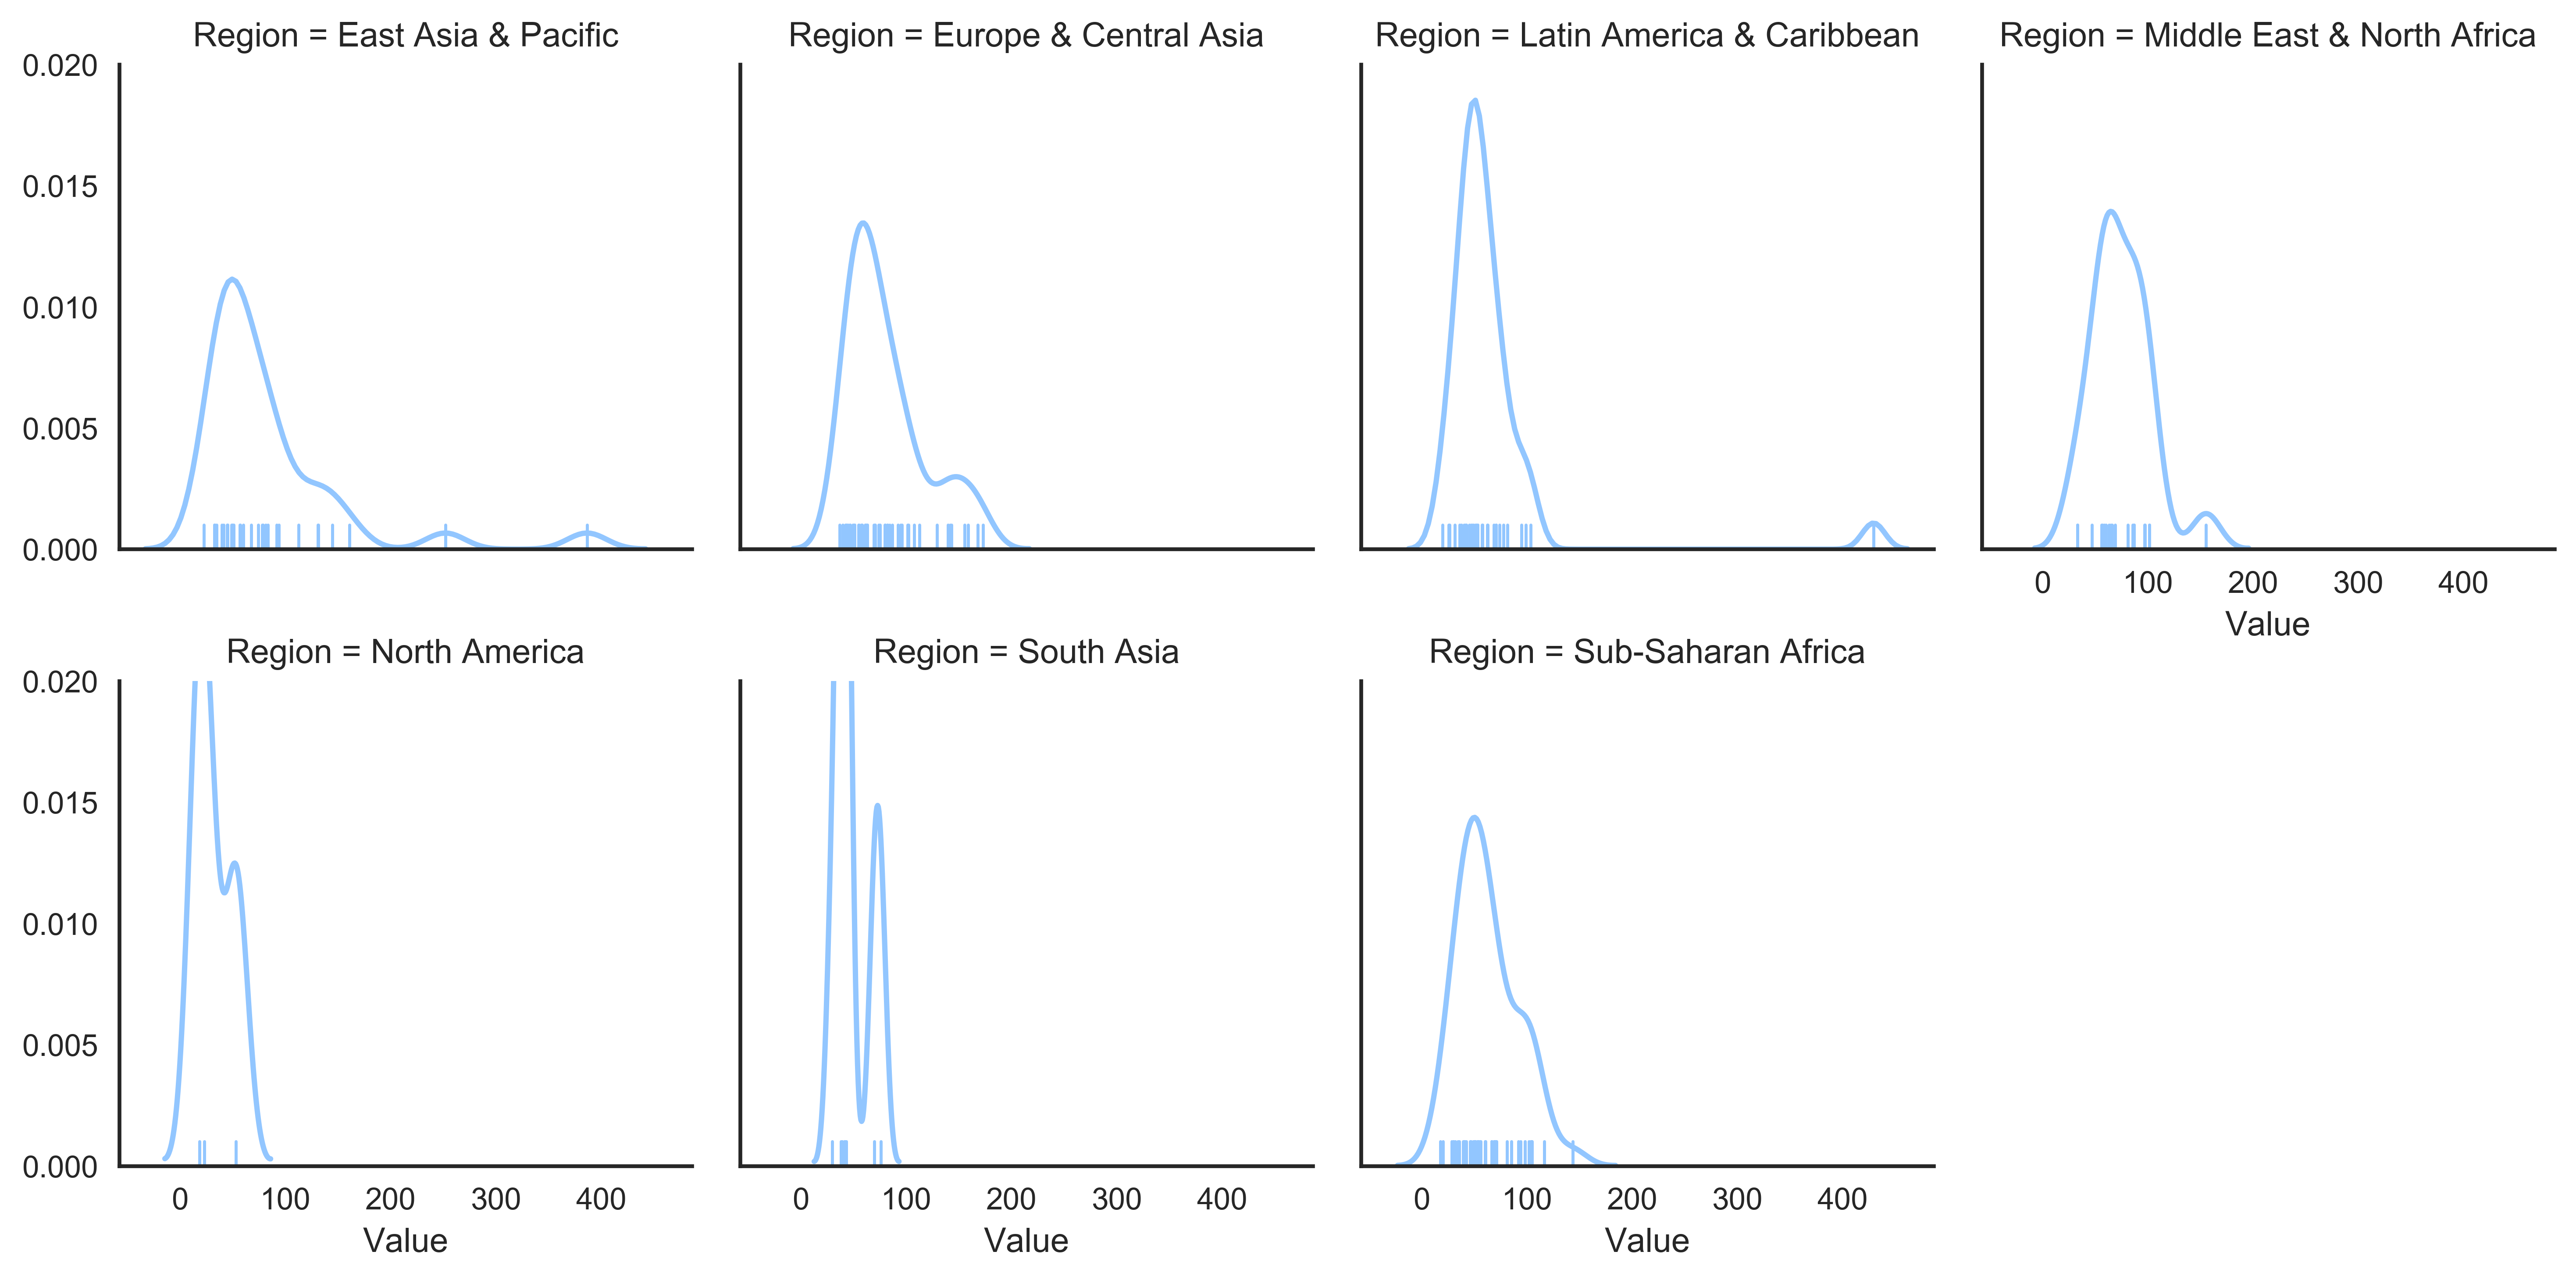

In [15]:
columns_order = sort(data_plot.Region.unique())

sns.set(style="white", 
        palette="pastel", 
        color_codes=True, 
        rc={
            'figure.figsize':(12,8),'figure.dpi':500
           })

g = sns.FacetGrid(data_plot,
                  col="Region",
                  col_wrap=4,
                  col_order=columns_order,subplot_kws={'ylim':(0,0.02)})
g.map(sns.distplot, "Value", hist=False, rug=True);
plt.savefig('./plots/07.rugplot.png', 
            dpi=500, bbox_inches='tight');